In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [171]:
dataset=pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [172]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [173]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset


In [174]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [175]:
df[['Region']]=df[['Region']].astype(int)

In [176]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [177]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [178]:
df=df.dropna().reset_index(drop=True)

In [179]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [180]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [181]:
df.columns=df.columns.str.strip()

In [182]:
df = df[df['day'] != 'day'] 
df = df.reset_index(drop=True)
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [183]:
objects=[features for features in df.columns if df[features].dtype=='O']
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [184]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv',index=False)

In [185]:
dfn=df.drop(['day','month','year'],axis=1)
dfn['Classes'].value_counts

<bound method IndexOpsMixin.value_counts of 0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object>

In [186]:
dfn['Classes']=np.where(dfn['Classes'].str.contains('not fire'),0,1)

In [187]:
dfn['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

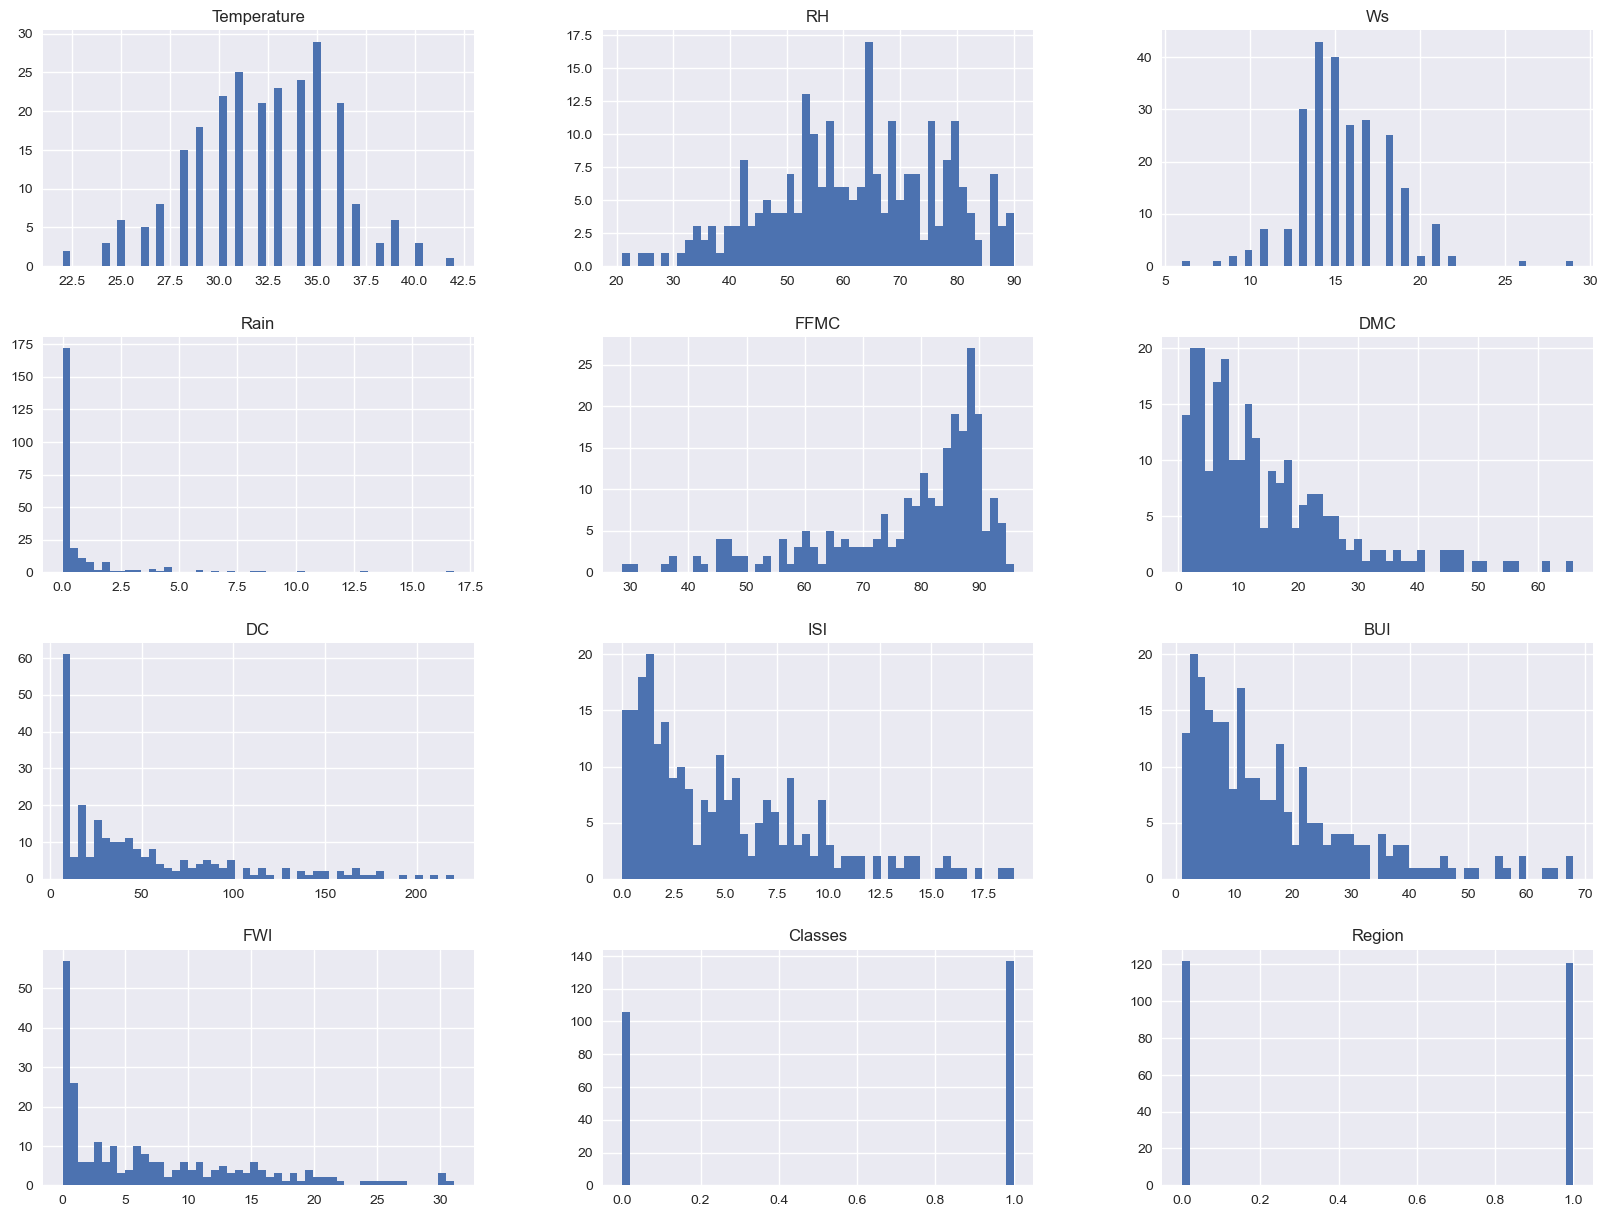

In [188]:
plt.style.use('seaborn-v0_8')
dfn.hist(bins=50,figsize=(20,15))
plt.show()

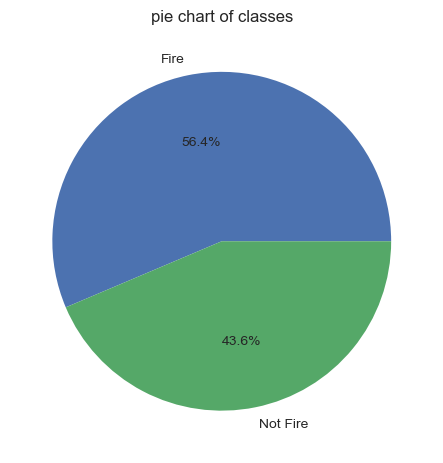

In [189]:
percentage=dfn['Classes'].value_counts(normalize=True)*100
label=["Fire","Not Fire"]
plt.Figure(figsize=(12,7))
plt.pie(percentage,labels=label,autopct='%1.1f%%')
plt.title("pie chart of classes")
plt.show()

<Axes: >

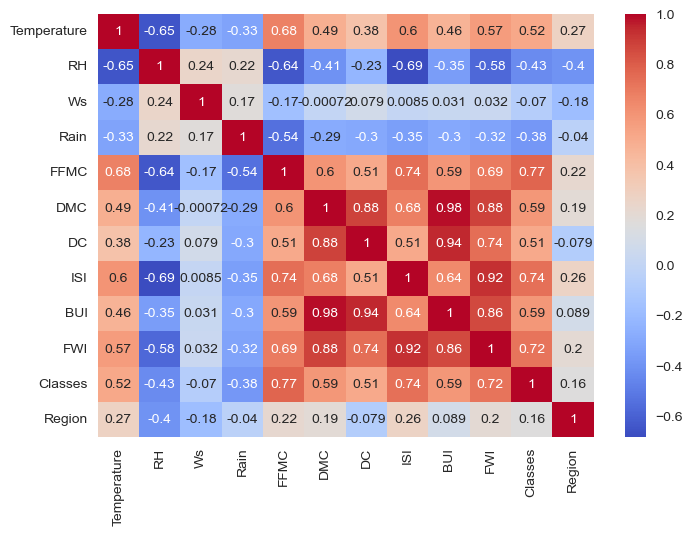

In [190]:
sns.heatmap(dfn.corr(), annot=True, cmap="coolwarm")

<Axes: ylabel='FWI'>

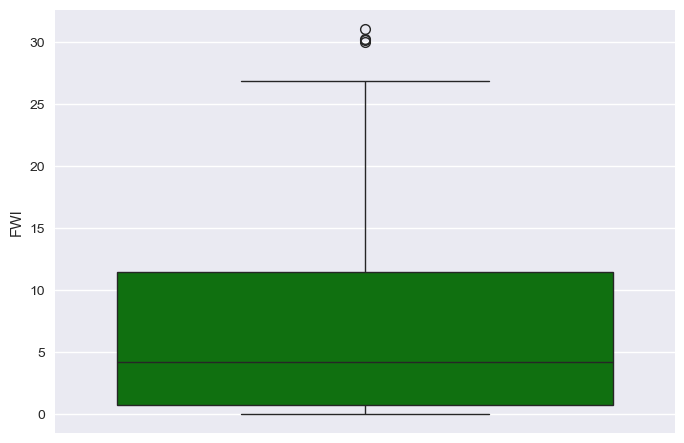

In [191]:
sns.boxplot(dfn['FWI'],color='green')

In [192]:
X=dfn.drop('FWI',axis=1)
y=dfn['FWI']

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [194]:
def correlation(dataset, threshold):
    col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col.add(colname)
    return col

In [195]:
corrfeatures=correlation(X_train,0.85)
X_train.drop(corrfeatures,axis=1,inplace=True)
X_test.drop(corrfeatures,axis=1,inplace=True)
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())


Columns in X_train: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes', 'Region']
Columns in X_test: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes', 'Region']


In [196]:
scaler=StandardScaler()
xtrainscaled=scaler.fit_transform(X_train)
xtestscaled=scaler.transform(X_test)

mean_absolute_error: 0.5468236465249993
r2_score: 0.9847657384266951


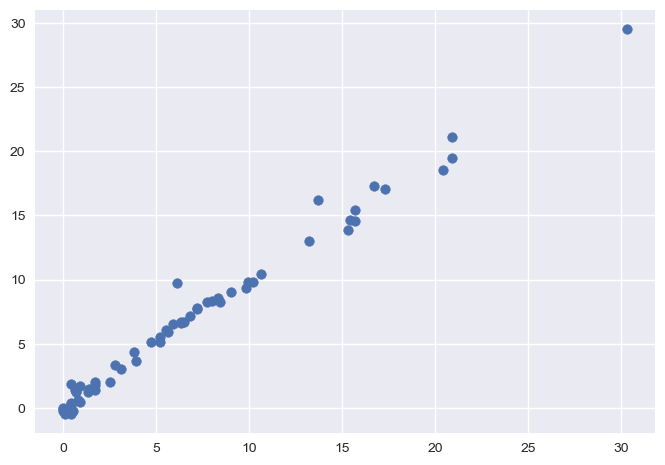

In [197]:
model=LinearRegression()
model.fit(xtrainscaled,y_train)
ypred=model.predict(xtestscaled)
mae=mean_absolute_error(y_test,ypred)
score=r2_score(y_test,ypred)
print("mean_absolute_error:",mae)
print("r2_score:",score)
plt.scatter(y_test,ypred)


In [198]:
import pickle
pickle.dump(scaler,open('Scaler.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))
